In [1]:
from fastai.tabular import * 

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/DeepLearning/'
path

'C:/Users/Jorge Mejia/Desktop/DeepLearning/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [22]:
valid_idx  =  range ( len ( df ) - 30 ,  len ( df ))

In [23]:
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [24]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_EVITPROBL', 'CSI_AUTOCRIT', 'ANSIEDADRASGO', 'CSI_REESTCOGN', 'CSI_PENSDESID', 'CAPE_POSIT_FREC', 'TRAUMA_FRECUENCIA', 'CSI_RETISOC', 'SCL90_IDEA_PARAN', 'CSI_RESPROBL', 'CSI_APOYOSOC']


In [25]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.996309 -1.270566  0.191819 -1.314311 ... -1.260164 -0.524119 -0.488047  1.107584]
 [-0.996309  0.317814 -0.114135 -0.945382 ...  0.225503  0.06265  -0.488047 -0.760054]
 [ 0.321805  0.847274 -0.114135  1.268195 ... -0.411211 -0.915299  0.111665  0.937798]
 [-1.43568  -0.035159  0.191819 -0.207523 ... -1.260164 -0.32853  -1.287663  0.088872]
 [-0.776623  0.317814 -0.726044 -0.945382 ... -0.835688  1.236188 -1.887375 -0.420484]]
[0 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit_one_cycle(5, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.927290,0.912384,0.736842,02:47
1,0.856274,1.393318,0.491228,02:35
2,0.740913,1.255101,0.631579,02:46
3,0.680581,1.058159,0.666667,02:54
4,0.629877,0.938091,0.684211,02:58


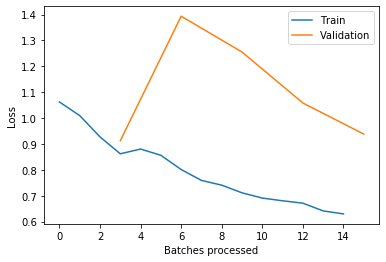

In [10]:
learn.recorder.plot_losses()

In [11]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit_one_cycle(10, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.994237,0.926761,0.701754,02:47
1,0.833245,1.466787,0.614035,02:46
2,0.769504,1.558359,0.596491,02:37
3,0.749970,1.699308,0.666667,02:27
4,0.746568,1.730510,0.666667,02:47
5,0.697729,1.348670,0.631579,02:33
6,0.653841,1.079446,0.684211,02:27
7,0.610046,0.973964,0.684211,02:34
8,0.565058,0.956855,0.684211,02:35
9,0.530103,0.936823,0.666667,02:32


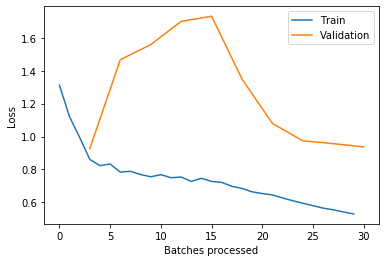

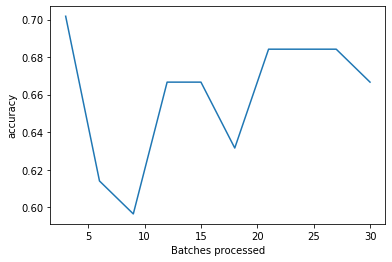

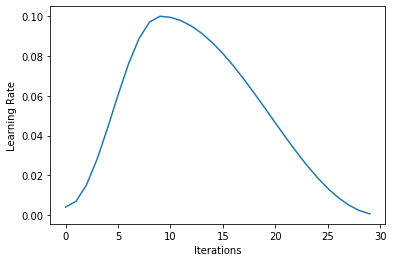

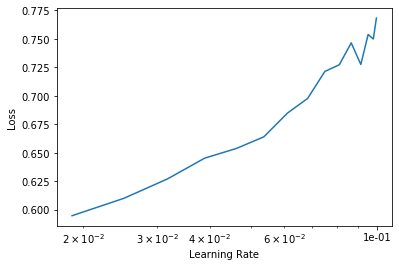

In [15]:
learn.recorder.plot_losses()
learn.recorder.plot_metrics()
learn.recorder.plot_lr()
learn.recorder.plot()

In [19]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit_one_cycle(5, 1e-1, wd = 0.02)

epoch,train_loss,valid_loss,accuracy,time
0,1.039039,1.613230,0.526316,02:45
1,1.064490,2.205032,0.649123,02:52
2,0.910624,1.061207,0.701754,02:34
3,0.805241,1.098147,0.736842,02:58
4,0.740177,1.057155,0.736842,02:41


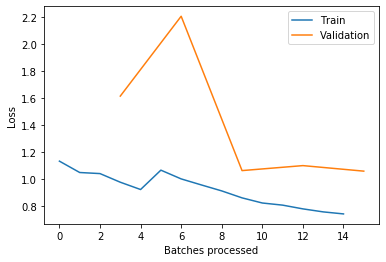

In [20]:
learn.recorder.plot_losses()

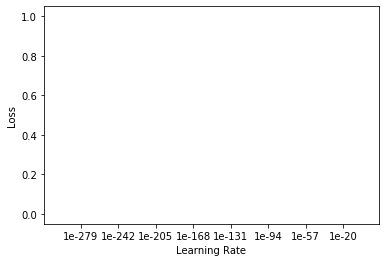

In [21]:
learn.recorder.plot()

In [26]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit_one_cycle(5, 1e-1, wd = 0.02)

epoch,train_loss,valid_loss,accuracy,time
0,0.992552,1.012718,0.666667,02:37
1,0.964947,0.758827,0.800000,02:28
2,0.882030,1.301999,0.700000,02:28
3,0.761516,1.258561,0.733333,02:30
4,0.684001,1.198183,0.733333,02:33


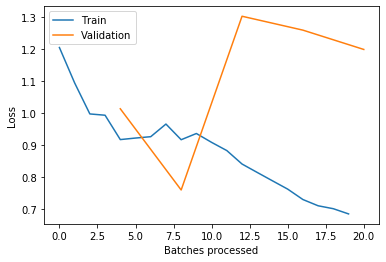

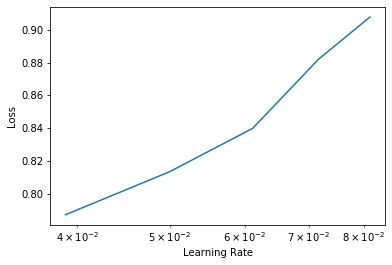

In [27]:
learn.recorder.plot_losses()
learn.recorder.plot()

In [28]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.942154,0.877728,0.700000,02:44
1,0.815057,0.790626,0.733333,02:36
2,0.733814,0.721465,0.733333,02:36
3,0.674980,0.665658,0.733333,02:33
4,0.625748,0.647551,0.766667,02:36


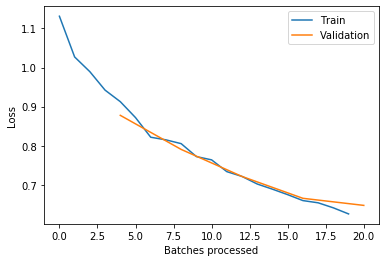

In [30]:
learn.recorder.plot_losses()

In [31]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.018359,0.954221,0.733333,02:41
1,0.872377,0.840050,0.733333,02:37
2,0.797083,0.750619,0.733333,02:44
3,0.748205,0.702625,0.733333,02:52
4,0.708687,0.689693,0.700000,02:47
5,0.670483,0.694420,0.700000,02:39
6,0.636951,0.700257,0.700000,02:44
7,0.602930,0.697552,0.700000,02:46
8,0.569164,0.696029,0.733333,02:56
9,0.536653,0.702179,0.766667,02:47


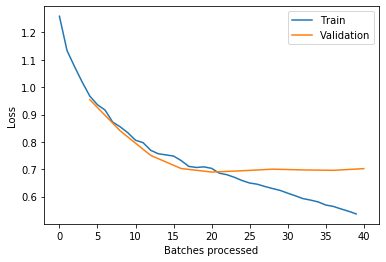

In [33]:
learn.recorder.plot_losses()

In [34]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.018110,0.975602,0.733333,02:53
1,0.899730,0.854960,0.733333,02:59
2,0.827115,0.772005,0.733333,02:56
3,0.769029,0.726374,0.733333,02:54
4,0.723876,0.699335,0.733333,02:45


CSI_EVITPROBL,CSI_AUTOCRIT,ANSIEDADRASGO,CSI_REESTCOGN,CSI_PENSDESID,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,CSI_RETISOC,SCL90_IDEA_PARAN,CSI_RESPROBL,CSI_APOYOSOC,target,prediction
-0.9963,-1.2706,-0.4201,0.8993,-1.5823,-0.6253,-0.5557,-0.1990,-0.9153,0.9113,0.0889,0,0
-0.7766,-0.3881,0.0388,-0.5765,-0.7402,0.3108,1.0491,0.2255,-0.1329,-1.2877,-1.4392,2,1
-1.4357,-1.0941,-0.2671,-1.1298,-0.4033,-0.4693,-0.4613,-1.0479,-0.3285,-2.0873,0.4284,0,0
-0.7766,-0.9176,0.1918,0.7148,-1.9191,-0.4693,-0.6501,-0.1990,-0.7197,1.3111,0.5982,0,0
-0.5569,-1.2706,-0.7260,-0.7609,-0.9086,-0.6253,1.0491,-0.4112,-0.1329,-0.8879,-0.7601,2,0


TabularModel
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm1d          [11]                 22         True      
______________________________________________________________________
Linear               [100]                1,200      True      
______________________________________________________________________
ReLU                 [100]                0          False     
______________________________________________________________________
BatchNorm1d          [100]                200        True      
______________________________________________________________________
Linear               [50]                 5,050      True      
______________________________________________________________________
ReLU                 [50]                 0          False     
______________________________________________________________________
BatchNorm1d          [50]                 100        True      
_________________________________________________

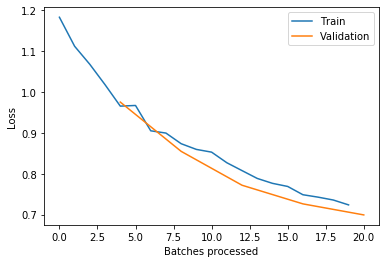

In [55]:
learn.recorder.plot_losses()
learn.show_results()
learn.summary()

In [56]:
learn = tabular_learner(data, layers=[200,100,50], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.049984,1.104549,0.300000,02:28
1,0.894225,0.981610,0.666667,02:32
2,0.799697,0.842120,0.700000,02:27
3,0.736255,0.748971,0.700000,02:26
4,0.678337,0.711484,0.700000,02:26


CSI_EVITPROBL,CSI_AUTOCRIT,ANSIEDADRASGO,CSI_REESTCOGN,CSI_PENSDESID,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,CSI_RETISOC,SCL90_IDEA_PARAN,CSI_RESPROBL,CSI_APOYOSOC,target,prediction
-0.9963,-1.2706,-0.4201,0.8993,-1.5823,-0.6253,-0.5557,-0.1990,-0.9153,0.9113,0.0889,0,0
-0.7766,-0.3881,0.0388,-0.5765,-0.7402,0.3108,1.0491,0.2255,-0.1329,-1.2877,-1.4392,2,1
-1.4357,-1.0941,-0.2671,-1.1298,-0.4033,-0.4693,-0.4613,-1.0479,-0.3285,-2.0873,0.4284,0,0
-0.7766,-0.9176,0.1918,0.7148,-1.9191,-0.4693,-0.6501,-0.1990,-0.7197,1.3111,0.5982,0,0
-0.5569,-1.2706,-0.7260,-0.7609,-0.9086,-0.6253,1.0491,-0.4112,-0.1329,-0.8879,-0.7601,2,0


TabularModel
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm1d          [11]                 22         True      
______________________________________________________________________
Linear               [200]                2,400      True      
______________________________________________________________________
ReLU                 [200]                0          False     
______________________________________________________________________
BatchNorm1d          [200]                400        True      
______________________________________________________________________
Linear               [100]                20,100     True      
______________________________________________________________________
ReLU                 [100]                0          False     
______________________________________________________________________
BatchNorm1d          [100]                200        True      
_________________________________________________

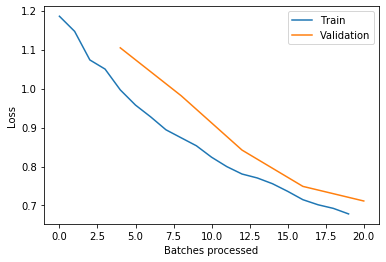

In [57]:
learn.recorder.plot_losses()
learn.show_results()
learn.summary()